In [1]:
import pandas as pd
import numpy as np

# Import and Initialize data

In [2]:
data = pd.read_csv('/content/train_dataset.csv')
data.head()

,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,Packets Tx Errors,...,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label
0,4,305111,25506841,100234870,284579,1657,0,0,0,0,...,0,0,0,1,0,6,992868,992744,-1,0
1,2,209,20671,6316631,274,96,0,0,0,0,...,183877,6303353,183877,1,0,8,90551,90494,-1,3
2,4,150,19774,6475473,3054,166,0,0,0,0,...,502,6439888,502,1,0,6,7516,7418,-1,2
3,1,4699,100986365,124574097,413351,2267,0,0,0,0,...,0,0,0,1,0,8,664849,664714,-1,0
4,3,990,104058,88896,778,792,0,0,0,0,...,715,7152,715,1,0,5,4328,4201,-1,1


In [3]:
# test
test_data = pd.read_csv('/content/test_dataset.csv')
test_data.head()

,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,Packets Tx Errors,...,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size
0,2,1516,37852942,35609292,246092,1400,0,0,0,0,...,0,0,0,0,1,0,6,649148,649024,-1
1,3,182335,191155854,232913950,292956,2927,0,0,0,0,...,6305279,179,6305279,179,1,0,8,674941,674804,-1
2,1,180594,58085529,12697283,300026,1750,0,0,0,0,...,0,0,0,0,1,0,6,957699,957567,-1
3,2,280,6317648,14403,109,111,0,0,0,0,...,0,0,0,0,1,0,6,52073,51982,-1
4,3,173724,32530097,19003413,151576,935,0,0,0,0,...,0,0,0,0,1,0,4,643392,643276,-1


In [4]:
data.shape

(4998, 32)

In [5]:
# So we have 31 features + 1 target variable

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Port Number                    4998 non-null   int64
 1   Received Packets               4998 non-null   int64
 2   Received Bytes                 4998 non-null   int64
 3   Sent Bytes                     4998 non-null   int64
 4   Sent Packets                   4998 non-null   int64
 5   Port alive Duration (S)        4998 non-null   int64
 6   Packets Rx Dropped             4998 non-null   int64
 7   Packets Tx Dropped             4998 non-null   int64
 8   Packets Rx Errors              4998 non-null   int64
 9   Packets Tx Errors              4998 non-null   int64
 10  Delta Received Packets         4998 non-null   int64
 11  Delta Received Bytes           4998 non-null   int64
 12  Delta Sent Bytes               4998 non-null   int64
 13  Delta Sent Packets

In [7]:
# There are no null values in any column
# All are integer values and hence typeconversion is not required

In [8]:
data.describe()

,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,Packets Tx Errors,...,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label
count,4998.000000,4998.000000,4.998000e+03,4.998000e+03,4998.000000,4998.000000,4998.0,4998.0,4998.0,4998.0,...,4.998000e+03,4.998000e+03,4.998000e+03,4998.0,4998.0,4998.000000,4.998000e+03,4.998000e+03,4998.0,4998.000000
mean,2.235094,83932.478191,4.721429e+07,4.743702e+07,148407.440176,1377.489996,0.0,0.0,0.0,0.0,...,2.354032e+04,5.956710e+05,2.354032e+04,1.0,0.0,54.488796,4.113947e+05,4.112736e+05,-1.0,1.157263
std,1.062464,122394.118041,4.951127e+07,4.894604e+07,149713.797741,984.424260,0.0,0.0,0.0,0.0,...,1.224342e+05,1.950752e+06,1.224342e+05,0.0,0.0,617.386958,3.889002e+05,3.888962e+05,0.0,1.448080
min,1.000000,10.000000,8.560000e+02,5.775000e+03,42.000000,26.000000,0.0,0.0,0.0,0.0,...,-6.303550e+05,0.000000e+00,-6.303550e+05,1.0,0.0,4.000000,1.050000e+02,5.000000e+01,-1.0,0.000000
25%,1.000000,836.500000,8.643970e+06,6.548716e+06,1042.250000,241.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0,5.000000,6.826250e+03,6.661750e+03,-1.0,0.000000
50%,2.000000,3595.500000,2.559362e+07,2.977196e+07,134206.500000,1385.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0,6.000000,5.122400e+05,5.121590e+05,-1.0,0.000000
75%,3.000000,178957.750000,7.572793e+07,7.609763e+07,287707.500000,2237.000000,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.0,7.000000,6.659060e+05,6.657710e+05,-1.0,2.000000
max,4.000000,352772.000000,2.715916e+08,2.392430e+08,421598.000000,3317.000000,0.0,0.0,0.0,0.0,...,1.746749e+06,1.891030e+07,1.746749e+06,1.0,0.0,9987.000000,1.012574e+06,1.012439e+06,-1.0,5.000000


In [9]:
# A great difference is seen in variances and means of the columns, so standardization has to be performed before running models

In [10]:
l = []
for i in data:
  k = [i, data[i].nunique()]
  l.append(k)
print(l)

[['Port Number', 4], ['Received Packets', 3451], ['Received Bytes', 4101], ['Sent Bytes', 4928], ['Sent Packets', 4270], ['Port alive Duration (S)', 975], ['Packets Rx Dropped', 1], ['Packets Tx Dropped', 1], ['Packets Rx Errors', 1], ['Packets Tx Errors', 1], ['Delta Received Packets', 244], ['Delta Received Bytes', 853], ['Delta Sent Bytes', 812], ['Delta Sent Packets', 228], ['Delta Port alive Duration (S)', 2], ['Delta Packets Rx Dropped', 1], [' Delta Packets Tx Dropped', 1], ['Delta Packets Rx Errors', 1], ['Delta Packets Tx Errors', 1], ['Connection Point', 5], ['Total Load/Rate', 380], ['Total Load/Latest', 484], ['Unknown Load/Rate', 380], ['Unknown Load/Latest', 484], ['Latest bytes counter', 380], ['is_valid', 1], ['Table ID', 1], ['Active Flow Entries', 37], ['Packets Looked Up', 3189], ['Packets Matched', 3191], ['Max Size', 1], ['Label', 6]]


In [11]:
from tabulate import tabulate
head = ["Feature", "Num_unique_values"]
print(tabulate(l, headers=head, tablefmt="grid"))

+-------------------------------+---------------------+
| Feature                       |   Num_unique_values |
+===============================+=====================+
| Port Number                   |                   4 |
+-------------------------------+---------------------+
| Received Packets              |                3451 |
+-------------------------------+---------------------+
| Received Bytes                |                4101 |
+-------------------------------+---------------------+
| Sent Bytes                    |                4928 |
+-------------------------------+---------------------+
| Sent Packets                  |                4270 |
+-------------------------------+---------------------+
| Port alive Duration (S)       |                 975 |
+-------------------------------+---------------------+
| Packets Rx Dropped            |                   1 |
+-------------------------------+---------------------+
| Packets Tx Dropped            |               

In [12]:
# there are some features which have only one value across the entire data - 11 features
# As those features will be of no use while predicting, they can be removed

In [13]:
drop_fet = ['Packets Rx Dropped', 'Packets Tx Dropped', 'Packets Rx Errors', 'Packets Tx Errors', 'Delta Packets Rx Dropped', ' Delta Packets Tx Dropped', 'Delta Packets Rx Errors', 'Delta Packets Tx Errors', 'is_valid', 'Table ID', 'Max Size']
data.drop(columns = drop_fet, inplace = True)
data.shape

(4998, 21)

In [14]:
# 21 features left after removing all of them

In [15]:
#test
test_data.drop(columns = drop_fet, inplace = True)
test_data.shape

(2143, 20)

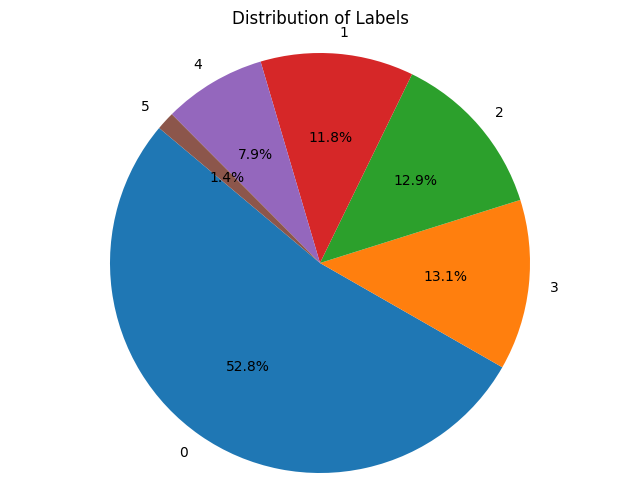

In [16]:
import matplotlib.pyplot as plt
label_counts = data['Label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labels')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.

# Display the pie chart
plt.show()

In [17]:
data.Label.value_counts()

0    2641
3     656
2     646
1     589
4     395
5      71
Name: Label, dtype: int64

In [18]:
l1 = []
for i in l:
  if (i[1]<10) & (i[1] != 1):
    l1.append(i)
print(l1)

[['Port Number', 4], ['Delta Port alive Duration (S)', 2], ['Connection Point', 5], ['Label', 6]]


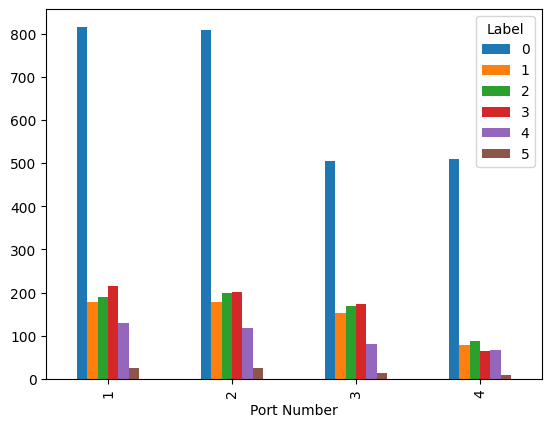

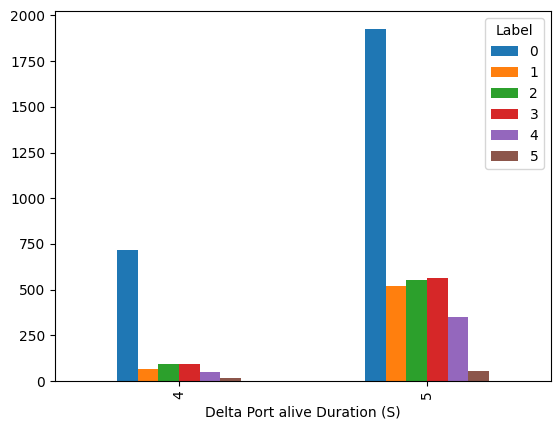

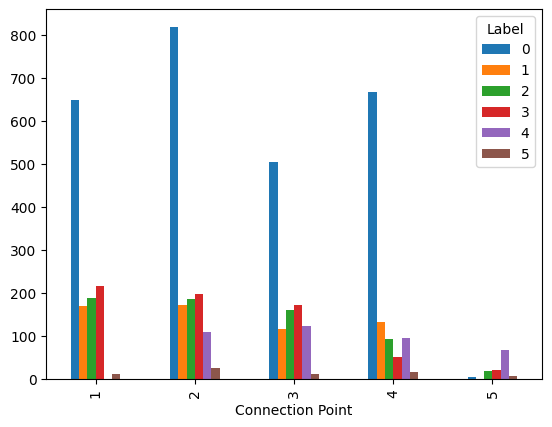

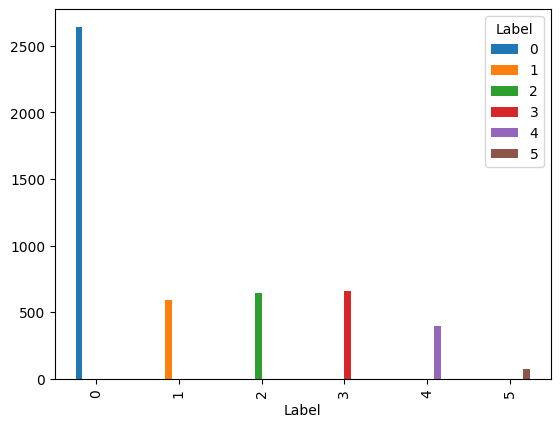

In [19]:
for i in l1:
  k=i[0]
  pd.crosstab(data[k],data['Label']).plot(kind = 'bar')

<Axes: xlabel='Port Number'>

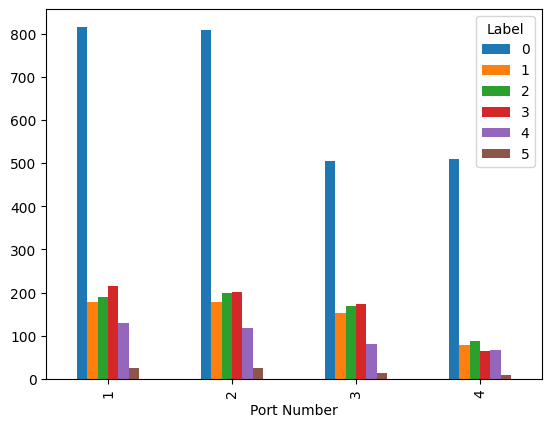

In [20]:
pd.crosstab(data['Port Number'], data['Label']).plot(kind = 'bar')

In [21]:
# Port number cannot be numerical - It has to be dummified

In [22]:
data_encoded = pd.get_dummies(data, columns = ['Port Number'])
data_encoded.shape

(4998, 24)

In [23]:
# test
test_data = pd.get_dummies(test_data, columns = ['Port Number'])
test_data.shape

(2143, 23)

#I. Data Visualization

In [24]:
data.columns

Index(['Port Number', 'Received Packets', 'Received Bytes', 'Sent Bytes',
       'Sent Packets', 'Port alive Duration (S)', 'Delta Received Packets',
       'Delta Received Bytes', 'Delta Sent Bytes', 'Delta Sent Packets',
       'Delta Port alive Duration (S)', 'Connection Point', 'Total Load/Rate',
       'Total Load/Latest', 'Unknown Load/Rate', 'Unknown Load/Latest',
       'Latest bytes counter', 'Active Flow Entries', 'Packets Looked Up',
       'Packets Matched', 'Label'],
      dtype='object')

In [25]:
data['Port Number'].value_counts()

1    1554
2    1532
3    1095
4     817
Name: Port Number, dtype: int64

<Axes: xlabel='Port Number'>

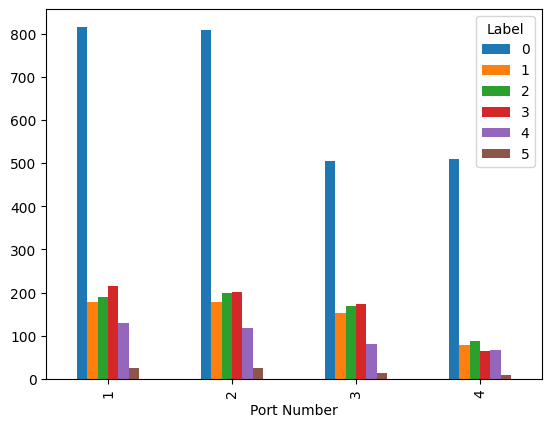

In [26]:
pd.crosstab(data['Port Number'], data['Label']).plot(kind = 'bar')

In [27]:
X = data_encoded.drop(columns = ['Label'])
y = data_encoded['Label']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 2,
                                                    stratify = y)

In [29]:
# standardise the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# test
test_data = scaler.transform(test_data)

# Defining Evaluations

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(confusion_matrix):
    labels = [0,1,2,3,4,5]
    fig, ax = plt.subplots()
    im = ax.imshow(confusion_matrix, cmap='Blues')

    # Set labels
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, confusion_matrix[i, j], ha="center", va="center", color="black")

    # Set colorbar
    cbar = ax.figure.colorbar(im, ax=ax)

    # Set title and labels
    ax.set_title("Confusion Matrix")
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")

    # Show the plot
    plt.show()

In [32]:
def scores(pred, test):
  accuracy = accuracy_score(pred, test)
  precision = precision_score(pred, test, average = 'weighted')
  recall = recall_score(pred, test, average = 'weighted')
  f1 = f1_score(pred, test, average = 'weighted')
  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 Score:", f1)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluation(y_train_pred, y_test_pred, y_train, y_test):
  print('--------------------------------------------------------------')
  print('--------------------------------------------------------------')

  #Evaluation of training data
  print("train_evaluation:\n")
  print(classification_report(y_train_pred, y_train))
  print(confusion_matrix(y_train_pred, y_train))
  plot_confusion_matrix(confusion_matrix(y_train_pred, y_train))
  scores(y_train, y_train_pred)
  print('--------------------------------------------------------------')

  # Evaluation of testing data
  print("\ntest_evaluation:\n")
  print(classification_report(y_test_pred, y_test))
  print(confusion_matrix(y_test_pred, y_test))
  plot_confusion_matrix(confusion_matrix(y_test_pred, y_test))
  scores(y_test, y_test_pred)
  print('--------------------------------------------------------------')
  print('--------------------------------------------------------------')

#1. Decision Tree Classifier

--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2112
           1       1.00      1.00      1.00       471
           2       1.00      1.00      1.00       517
           3       1.00      1.00      1.00       525
           4       1.00      1.00      1.00       316
           5       1.00      1.00      1.00        57

    accuracy                           1.00      3998
   macro avg       1.00      1.00      1.00      3998
weighted avg       1.00      1.00      1.00      3998

[[2112    0    0    0    0    0]
 [   0  471    0    0    0    0]
 [   0    0  517    0    0    0]
 [   0    0    0  525    0    0]
 [   0    0    0    0  316    0]
 [   0    0    0    0    0   57]]


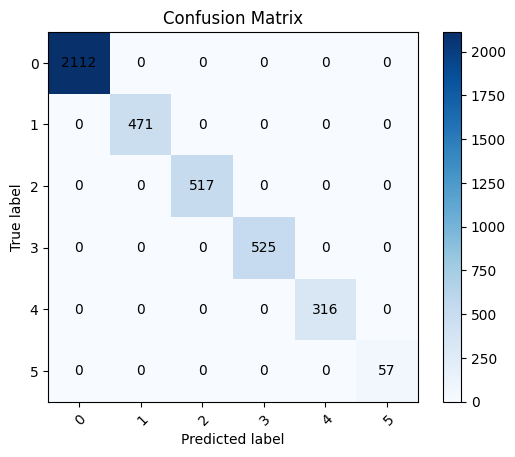

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       529
           1       0.91      0.92      0.91       116
           2       0.82      0.77      0.79       138
           3       0.80      0.83      0.81       127
           4       0.91      0.94      0.92        77
           5       0.50      0.54      0.52        13

    accuracy                           0.93      1000
   macro avg       0.82      0.83      0.83      1000
weighted avg       0.93      0.93      0.93      1000

[[529   0   0   0   0   0]
 [  0 107   4   0   2   3]
 [  0   6 106  20   3   3]
 [  0   2  18 105   2   0]
 [  0   2   0   2  72   1]
 [  0   1   1   4   0   7]]


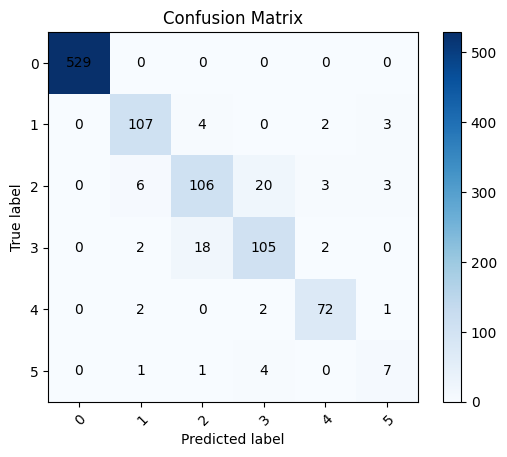

Accuracy: 0.926
Precision: 0.9266474621307107
Recall: 0.926
F1 Score: 0.926151739365745
--------------------------------------------------------------
--------------------------------------------------------------
None


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight = 'balanced')
dtc.fit(X_train, y_train)
y_test_pred = dtc.predict(X_test)
y_train_pred = dtc.predict(X_train)
print(evaluation(y_train_pred, y_test_pred, y_train, y_test))

In [ ]:
# importances = dt.feature_importances_

# # Sort the importances in descending order
# indices = np.argsort(importances)[::-1]

# # Print the feature ranking
# print("Feature ranking:")
# for i, index in enumerate(indices):
#     print(f"{i+1}. Feature {index}: {importances[index]}")

NameError: ignored

#2. Random Forest Classifier

--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2112
           1       1.00      1.00      1.00       470
           2       1.00      1.00      1.00       518
           3       1.00      1.00      1.00       526
           4       1.00      1.00      1.00       316
           5       0.98      1.00      0.99        56

    accuracy                           1.00      3998
   macro avg       1.00      1.00      1.00      3998
weighted avg       1.00      1.00      1.00      3998

[[2112    0    0    0    0    0]
 [   0  470    0    0    0    0]
 [   0    1  517    0    0    0]
 [   0    0    0  525    0    1]
 [   0    0    0    0  316    0]
 [   0    0    0    0    0   56]]


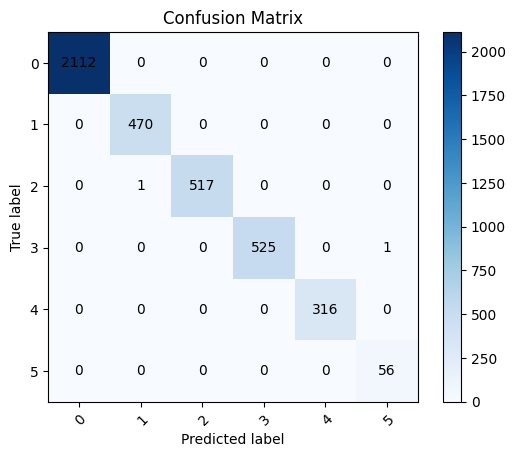

Accuracy: 0.9994997498749375
Precision: 0.9995007082647861
Recall: 0.9994997498749375
F1 Score: 0.9994987500502229
--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       529
           1       0.94      0.89      0.91       125
           2       0.88      0.77      0.82       147
           3       0.84      0.86      0.85       128
           4       0.85      0.99      0.91        68
           5       0.21      1.00      0.35         3

    accuracy                           0.93      1000
   macro avg       0.79      0.92      0.81      1000
weighted avg       0.94      0.93      0.94      1000

[[529   0   0   0   0   0]
 [  0 111   1   0   8   5]
 [  0   7 113  21   2   4]
 [  0   0  15 110   2   1]
 [  0   0   0   0  67   1]
 [  0   0   0   0   0   3]]


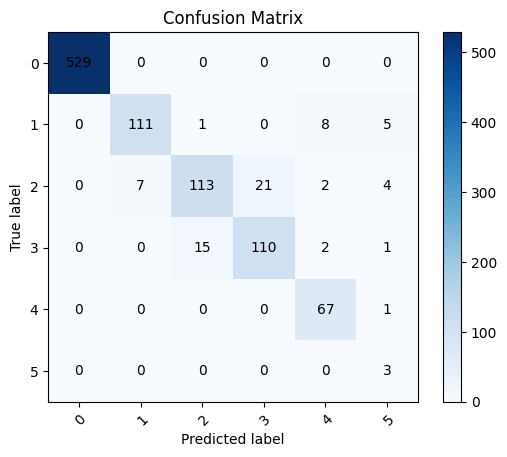

Accuracy: 0.933
Precision: 0.9373636256002401
Recall: 0.933
F1 Score: 0.9306618171053077
--------------------------------------------------------------
--------------------------------------------------------------
None


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=25)
rfc.fit(X_train, y_train)
y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
print(evaluation(y_train_pred, y_test_pred, y_train, y_test))

VIF

In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif_data = pd.DataFrame()
# vif_data["feature"] = data_encoded.columns
# vif_data["VIF"] = [variance_inflation_factor(data_encoded.values, i) for i in range(len(data_encoded.columns))]
# print(vif_data)

#3. Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2112
           1       0.83      0.98      0.90       403
           2       0.93      0.61      0.73       787
           3       0.55      0.88      0.68       330
           4       0.93      0.87      0.90       341
           5       0.35      0.80      0.49        25

    accuracy                           0.90      3998
   macro avg       0.77      0.86      0.78      3998
weighted avg       0.92      0.90      0.90      3998

[[2112    0    0    0    0    0]
 [   0  393    5    0    1    4]
 [   0   38  479  234   17   19]
 [   0    4   30  291    0    5]
 [   0   34    3    0  295    9]
 [   0    2    0    0    3   20]]


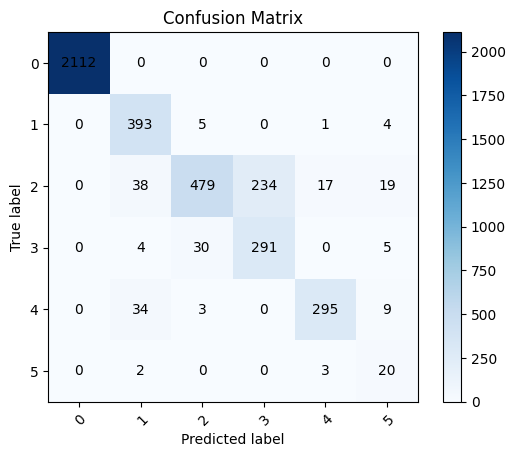

Accuracy: 0.8979489744872436
Precision: 0.9174353988931965
Recall: 0.8979489744872436
F1 Score: 0.8965345782704603
--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       529
           1       0.80      0.96      0.87        98
           2       0.91      0.61      0.73       192
           3       0.60      0.87      0.71        91
           4       0.92      0.87      0.90        84
           5       0.21      0.50      0.30         6

    accuracy                           0.90      1000
   macro avg       0.74      0.80      0.75      1000
weighted avg       0.91      0.90      0.90      1000

[[529   0   0   0   0   0]
 [  0  94   2   0   2   0]
 [  0  14 117  52   2   7]
 [  0   2   9  79   0   1]
 [  0   8   0   0  73   3]
 [  0   0   1   0   2   3]]


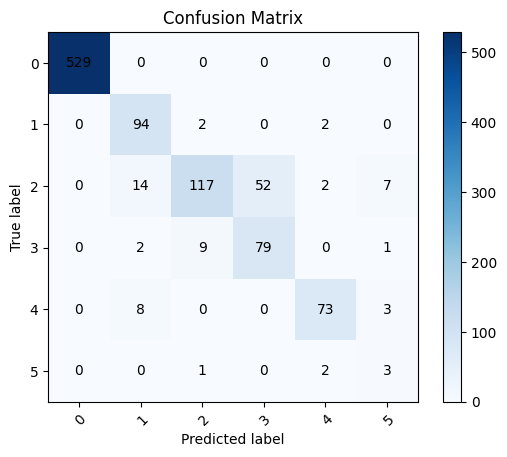

Accuracy: 0.895
Precision: 0.9101730850994244
Recall: 0.895
F1 Score: 0.8939360573118271
--------------------------------------------------------------
--------------------------------------------------------------
None


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_test_pred = logreg.predict(X_test)
y_train_pred = logreg.predict(X_train)
print(evaluation(y_train_pred, y_test_pred, y_train, y_test))

#4. Naive Bayes Classifier

Accuracy: 0.814
--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2124
           1       0.41      0.70      0.52       277
           2       0.97      0.58      0.73       855
           3       0.47      0.98      0.64       252
           4       0.65      0.52      0.58       395
           5       0.40      0.24      0.30        95

    accuracy                           0.82      3998
   macro avg       0.65      0.67      0.63      3998
weighted avg       0.87      0.82      0.83      3998

[[2112    2    0    8    2    0]
 [   0  194    7    2   70    4]
 [   0   44  500  254   28   29]
 [   0    0    5  247    0    0]
 [   0  179    0    9  206    1]
 [   0   52    5    5   10   23]]


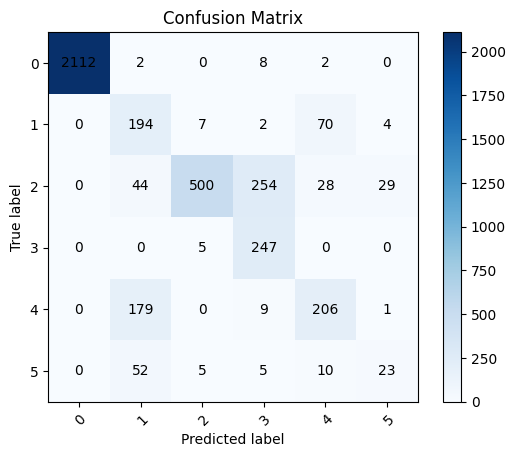

Accuracy: 0.8209104552276139
Precision: 0.8567934835745714
Recall: 0.8209104552276139
F1 Score: 0.8157327557573354
--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       531
           1       0.40      0.69      0.51        68
           2       0.95      0.57      0.71       215
           3       0.50      0.97      0.66        67
           4       0.62      0.53      0.57        92
           5       0.14      0.07      0.10        27

    accuracy                           0.81      1000
   macro avg       0.60      0.64      0.59      1000
weighted avg       0.86      0.81      0.82      1000

[[529   0   0   1   1   0]
 [  0  47   2   0  19   0]
 [  0  15 122  59   8  11]
 [  0   0   2  65   0   0]
 [  0  38   0   4  49   1]
 [  0  18   3   2   2   2]]


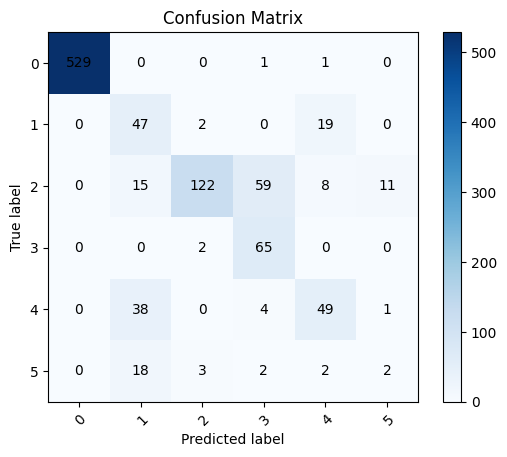

Accuracy: 0.814
Precision: 0.851969032718462
Recall: 0.814
F1 Score: 0.8117871038644106
--------------------------------------------------------------
--------------------------------------------------------------
None


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
classifier = GaussianNB()

# Train the classifier
classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

y_test_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print(evaluation(y_train_pred, y_test_pred, y_train, y_test))

#5. KNN Classifier

--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2112
           1       1.00      1.00      1.00       471
           2       1.00      1.00      1.00       517
           3       1.00      1.00      1.00       525
           4       1.00      1.00      1.00       316
           5       1.00      1.00      1.00        57

    accuracy                           1.00      3998
   macro avg       1.00      1.00      1.00      3998
weighted avg       1.00      1.00      1.00      3998

[[2112    0    0    0    0    0]
 [   0  471    0    0    0    0]
 [   0    0  517    0    0    0]
 [   0    0    0  525    0    0]
 [   0    0    0    0  316    0]
 [   0    0    0    0    0   57]]


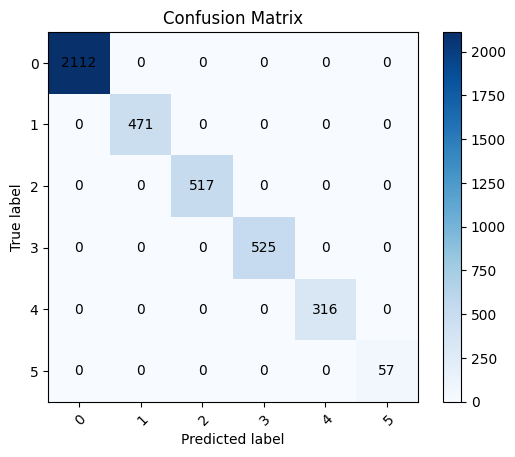

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       530
           1       0.80      0.93      0.86       101
           2       0.74      0.65      0.69       146
           3       0.74      0.75      0.75       129
           4       0.90      0.84      0.87        85
           5       0.29      0.44      0.35         9

    accuracy                           0.89      1000
   macro avg       0.74      0.77      0.75      1000
weighted avg       0.89      0.89      0.89      1000

[[529   0   1   0   0   0]
 [  0  94   4   1   2   0]
 [  0  15  95  32   3   1]
 [  0   3  26  97   2   1]
 [  0   3   3   0  71   8]
 [  0   3   0   1   1   4]]


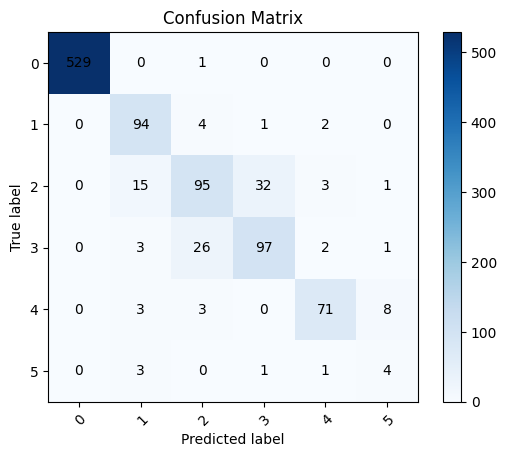

Accuracy: 0.89
Precision: 0.8924763586203863
Recall: 0.89
F1 Score: 0.8899427066117076
--------------------------------------------------------------
--------------------------------------------------------------
None


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)
print(evaluation(y_train_pred, y_test_pred, y_train, y_test))

#6. XGBoost Classifier

--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2112
           1       1.00      1.00      1.00       471
           2       1.00      1.00      1.00       517
           3       1.00      1.00      1.00       525
           4       1.00      1.00      1.00       316
           5       1.00      1.00      1.00        57

    accuracy                           1.00      3998
   macro avg       1.00      1.00      1.00      3998
weighted avg       1.00      1.00      1.00      3998

[[2112    0    0    0    0    0]
 [   0  471    0    0    0    0]
 [   0    0  517    0    0    0]
 [   0    0    0  525    0    0]
 [   0    0    0    0  316    0]
 [   0    0    0    0    0   57]]


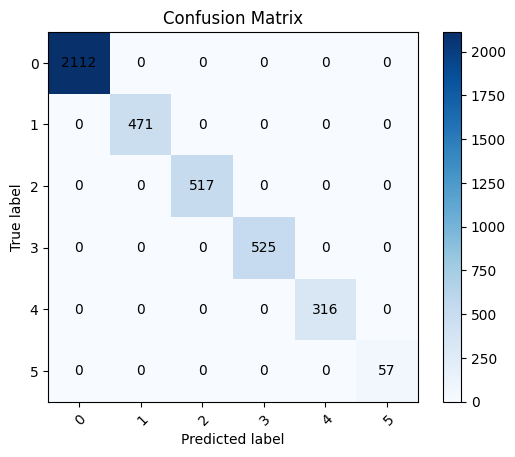

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       529
           1       0.94      0.96      0.95       116
           2       0.84      0.78      0.81       138
           3       0.85      0.85      0.85       131
           4       0.95      0.95      0.95        79
           5       0.43      0.86      0.57         7

    accuracy                           0.94      1000
   macro avg       0.83      0.90      0.85      1000
weighted avg       0.94      0.94      0.94      1000

[[529   0   0   0   0   0]
 [  0 111   2   0   1   2]
 [  0   6 108  20   1   3]
 [  0   0  19 111   1   0]
 [  0   1   0   0  75   3]
 [  0   0   0   0   1   6]]


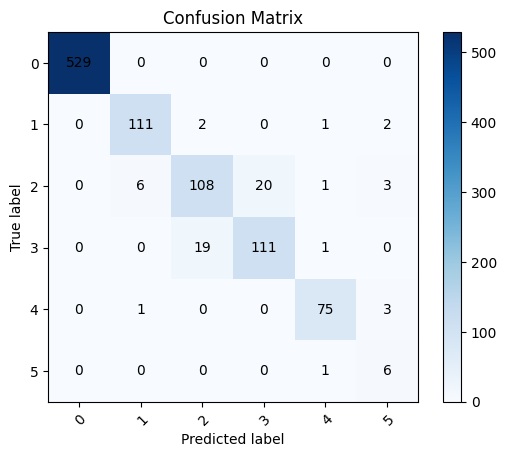

Accuracy: 0.94
Precision: 0.9408703148425787
Recall: 0.94
F1 Score: 0.9393082685105156
--------------------------------------------------------------
--------------------------------------------------------------
None


In [ ]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(objective="multi:softmax")
xgb_classifier.fit(X_train, y_train)
y_test_pred = xgb_classifier.predict(X_test)
y_train_pred = xgb_classifier.predict(X_train)
print(evaluation(y_train_pred, y_test_pred, y_train, y_test))

# 7. AdaBoost Classifier

--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2112
           1       0.04      0.11      0.06       160
           2       0.71      0.69      0.70       531
           3       0.50      1.00      0.66       260
           4       0.92      0.33      0.49       875
           5       0.51      0.48      0.50        60

    accuracy                           0.77      3998
   macro avg       0.61      0.60      0.57      3998
weighted avg       0.86      0.77      0.78      3998

[[2112    0    0    0    0    0]
 [   0   18   71   63    4    4]
 [   0    1  366  130   15   19]
 [   0    0    0  260    0    0]
 [   0  428   80   72  290    5]
 [   0   24    0    0    7   29]]


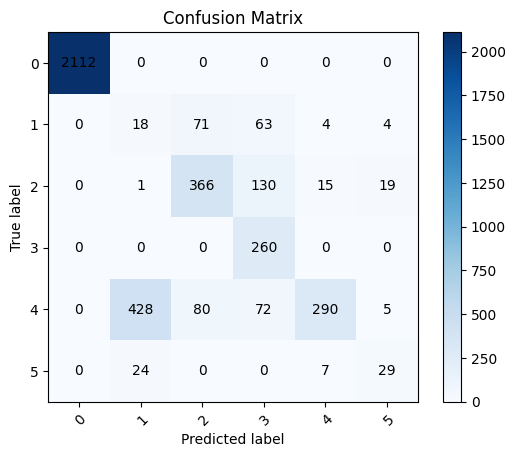

Accuracy: 0.7691345672836418
Precision: 0.7950523289287905
Recall: 0.7691345672836418
F1 Score: 0.7578531565158847
--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       529
           1       0.05      0.19      0.08        32
           2       0.70      0.68      0.69       133
           3       0.53      1.00      0.69        69
           4       0.92      0.33      0.49       221
           5       0.50      0.44      0.47        16

    accuracy                           0.77      1000
   macro avg       0.62      0.61      0.57      1000
weighted avg       0.87      0.77      0.79      1000

[[529   0   0   0   0   0]
 [  0   6  16   9   0   1]
 [  0   1  90  35   4   3]
 [  0   0   0  69   0   0]
 [  0 104  23  18  73   3]
 [  0   7   0   0   2   7]]


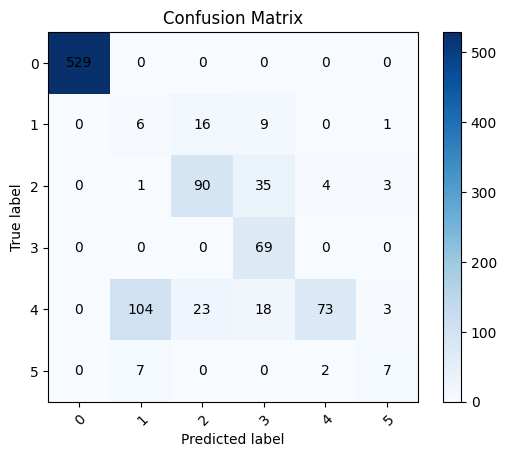

Accuracy: 0.774
Precision: 0.8016382557071412
Recall: 0.774
F1 Score: 0.7624359541984733
--------------------------------------------------------------
--------------------------------------------------------------
None


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# Create an AdaBoost classifier
classifier = AdaBoostClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = classifier.predict(X_test)
y_test_pred = classifier.predict(X_test)
y_train_pred = classifier.predict(X_train)
print(evaluation(y_train_pred, y_test_pred, y_train, y_test))

#8. Support Vector Classifier

--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2112
           1       0.83      0.98      0.90       403
           2       0.95      0.60      0.74       818
           3       0.50      0.92      0.65       284
           4       0.95      0.83      0.88       360
           5       0.35      0.95      0.51        21

    accuracy                           0.89      3998
   macro avg       0.76      0.88      0.78      3998
weighted avg       0.93      0.89      0.90      3998

[[2112    0    0    0    0    0]
 [   0  393    5    0    1    4]
 [   0   29  491  264   14   20]
 [   0    3   18  261    1    1]
 [   0   46    3    0  299   12]
 [   0    0    0    0    1   20]]


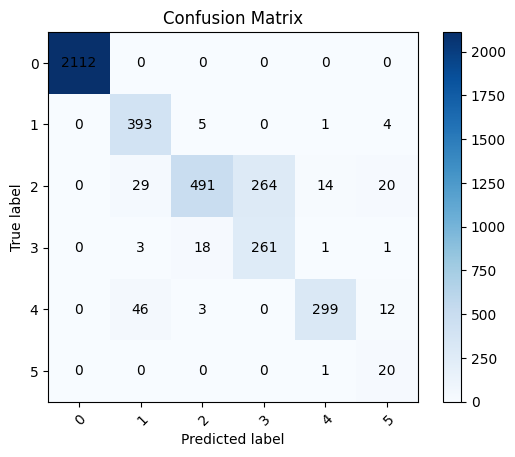

Accuracy: 0.894447223611806
Precision: 0.9206760193002218
Recall: 0.894447223611806
F1 Score: 0.8912937883971244
--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       529
           1       0.83      0.96      0.89       102
           2       0.95      0.60      0.74       204
           3       0.52      0.91      0.66        75
           4       0.90      0.83      0.86        86
           5       0.14      0.50      0.22         4

    accuracy                           0.89      1000
   macro avg       0.72      0.80      0.73      1000
weighted avg       0.93      0.89      0.89      1000

[[529   0   0   0   0   0]
 [  0  98   2   0   2   0]
 [  0  10 123  63   3   5]
 [  0   2   4  68   1   0]
 [  0   8   0   0  71   7]
 [  0   0   0   0   2   2]]


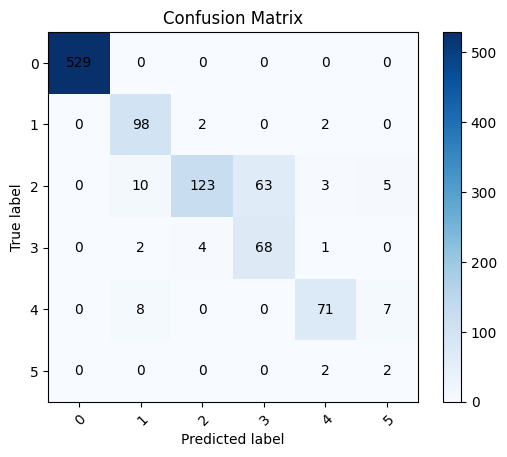

Accuracy: 0.891
Precision: 0.9111462243502051
Recall: 0.891
F1 Score: 0.8870089968167638
--------------------------------------------------------------
--------------------------------------------------------------
None


In [ ]:
from sklearn import svm

svc = svm.SVC(probability = True, kernel = 'linear', gamma = 0.001)
svc.fit(X_train, y_train)
y_test_pred = svc.predict(X_test)
y_train_pred = svc.predict(X_train)
print(evaluation(y_train_pred, y_test_pred, y_train, y_test))

--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2113
           1       0.83      0.96      0.89       405
           2       0.95      0.57      0.72       857
           3       0.47      0.88      0.62       282
           4       0.91      0.89      0.90       322
           5       0.33      1.00      0.50        19

    accuracy                           0.89      3998
   macro avg       0.75      0.88      0.77      3998
weighted avg       0.92      0.89      0.89      3998

[[2112    0    0    1    0    0]
 [   0  389    5    0   11    0]
 [   0   45  492  275   15   30]
 [   0    8   20  249    3    2]
 [   0   29    0    0  287    6]
 [   0    0    0    0    0   19]]


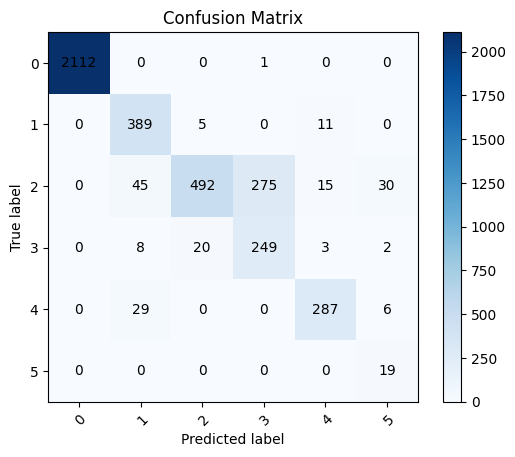

Accuracy: 0.8874437218609305
Precision: 0.9160621654489634
Recall: 0.8874437218609305
F1 Score: 0.884652388253278
--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       537
           1       0.78      0.95      0.86        97
           2       0.91      0.54      0.68       217
           3       0.44      0.80      0.56        71
           4       0.86      0.89      0.88        76
           5       0.14      1.00      0.25         2

    accuracy                           0.87      1000
   macro avg       0.69      0.86      0.70      1000
weighted avg       0.91      0.87      0.87      1000

[[529   1   5   2   0   0]
 [  0  92   2   0   3   0]
 [  0  18 118  72   4   5]
 [  0   4   4  57   4   2]
 [  0   3   0   0  68   5]
 [  0   0   0   0   0   2]]


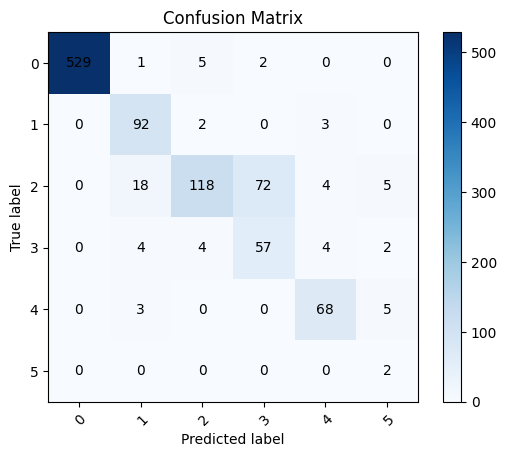

Accuracy: 0.866
Precision: 0.8930373964549538
Recall: 0.866
F1 Score: 0.8607513266812773
--------------------------------------------------------------
--------------------------------------------------------------
None


In [ ]:
svc = svm.SVC(probability = False, kernel = 'rbf', gamma = 0.1)
svc.fit(X_train, y_train)
y_test_pred = svc.predict(X_test)
y_train_pred = svc.predict(X_train)
print(evaluation(y_train_pred, y_test_pred, y_train, y_test))

#MLPClassifier

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2112
           1       0.96      0.96      0.96       468
           2       0.91      0.73      0.81       645
           3       0.69      0.87      0.77       412
           4       0.97      0.96      0.97       318
           5       0.63      0.84      0.72        43

    accuracy                           0.93      3998
   macro avg       0.86      0.89      0.87      3998
weighted avg       0.94      0.93      0.93      3998

[[2112    0    0    0    0    0]
 [   0  451    6    9    1    1]
 [   0   14  469  151    4    7]
 [   0    3   39  360    3    7]
 [   0    3    0    3  306    6]
 [   0    0    3    2    2   36]]


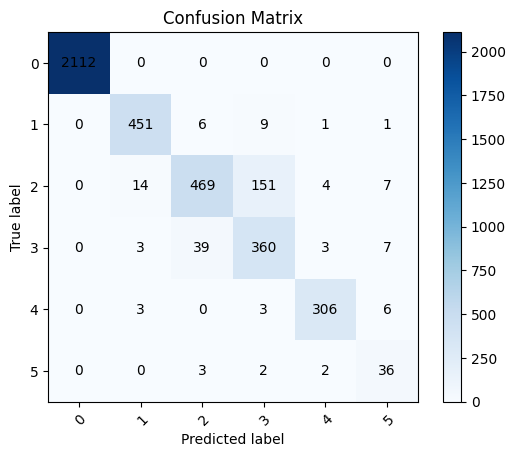

Accuracy: 0.9339669834917459
Precision: 0.9385573845503533
Recall: 0.9339669834917459
F1 Score: 0.9332836665910299
--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       529
           1       0.90      0.94      0.92       113
           2       0.81      0.68      0.74       155
           3       0.67      0.79      0.73       111
           4       0.96      0.90      0.93        84
           5       0.43      0.75      0.55         8

    accuracy                           0.91      1000
   macro avg       0.80      0.84      0.81      1000
weighted avg       0.92      0.91      0.91      1000

[[529   0   0   0   0   0]
 [  0 106   3   2   1   1]
 [  0   8 105  40   1   1]
 [  0   2  20  88   0   1]
 [  0   2   1   0  76   5]
 [  0   0   0   1   1   6]]


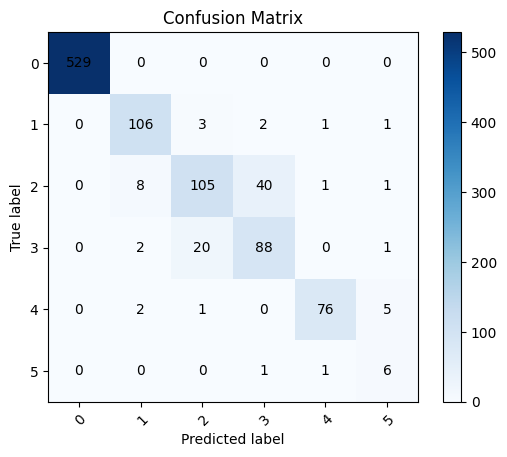

Accuracy: 0.91
Precision: 0.9129094085929657
Recall: 0.91
F1 Score: 0.9092594988035669
--------------------------------------------------------------
--------------------------------------------------------------
None


In [ ]:
from sklearn.neural_network import MLPClassifier


mlp_classifier = MLPClassifier(hidden_layer_sizes=(60, 30, 6), activation='relu', solver='adam', random_state=42)

# Train the classifier
mlp_classifier.fit(X_train, y_train)
y_test_pred = mlp_classifier.predict(X_test)
y_train_pred = mlp_classifier.predict(X_train)
print(evaluation(y_train_pred, y_test_pred, y_train, y_test))

In [ ]:
# implementation of PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca = PCA()

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [2.08832671e-01 1.78670168e-01 1.05801224e-01 7.40002705e-02
 6.61143753e-02 6.18243550e-02 4.71824749e-02 4.56225973e-02
 4.30247122e-02 4.11717751e-02 3.63289939e-02 3.27817031e-02
 2.01937235e-02 1.37386211e-02 1.15307784e-02 7.81207244e-03
 3.34465935e-03 2.02482475e-03 6.49750821e-11 1.19279288e-32
 8.27205721e-33 5.98271962e-34 1.48505443e-35]


# Voting classifier

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2112
           1       1.00      1.00      1.00       471
           2       1.00      1.00      1.00       518
           3       1.00      1.00      1.00       524
           4       1.00      1.00      1.00       316
           5       1.00      1.00      1.00        57

    accuracy                           1.00      3998
   macro avg       1.00      1.00      1.00      3998
weighted avg       1.00      1.00      1.00      3998

[[2112    0    0    0    0    0]
 [   0  471    0    0    0    0]
 [   0    0  517    1    0    0]
 [   0    0    0  524    0    0]
 [   0    0    0    0  316    0]
 [   0    0    0    0    0   57]]


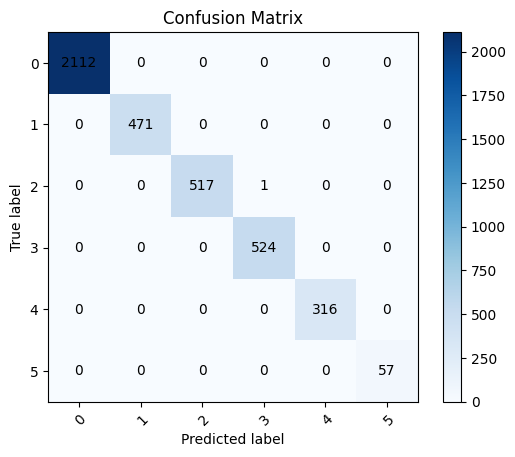

Accuracy: 0.9997498749374687
Precision: 0.9997503578043848
Recall: 0.9997498749374687
F1 Score: 0.9997498765501162
--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       529
           1       0.92      0.95      0.93       114
           2       0.91      0.72      0.80       165
           3       0.76      0.88      0.81       112
           4       0.92      0.95      0.94        77
           5       0.21      1.00      0.35         3

    accuracy                           0.93      1000
   macro avg       0.79      0.92      0.81      1000
weighted avg       0.94      0.93      0.93      1000

[[529   0   0   0   0   0]
 [  0 108   2   0   1   3]
 [  0   8 118  32   3   4]
 [  0   2   9  99   2   0]
 [  0   0   0   0  73   4]
 [  0   0   0   0   0   3]]


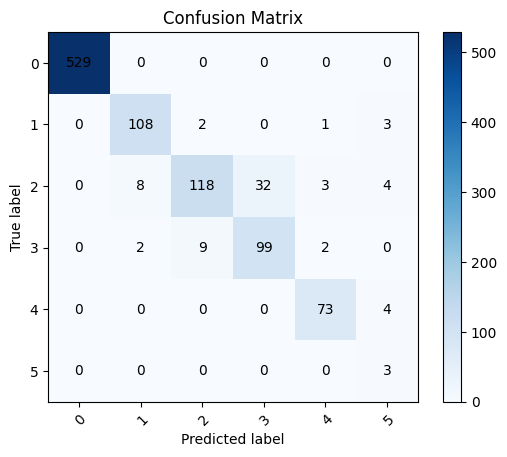

Accuracy: 0.93
Precision: 0.9377347658920028
Recall: 0.93
F1 Score: 0.9280309040209069
--------------------------------------------------------------
--------------------------------------------------------------
None


In [ ]:
from sklearn.ensemble import VotingClassifier

# Create a voting classifier with the individual classifiers
voting_classifier = VotingClassifier(estimators=[('dtc', dtc),
                                                  ('rfc', rfc),
                                                   ('lr', logreg),
                                                    ('KNN', knn),
                                                     ('xgb', xgb_classifier),
                                                      ('SVC', svc),
                                                       ('MLP', mlp_classifier)],
                                                        voting='hard')

# Train the voting classifier
voting_classifier.fit(X_train, y_train)
y_test_pred = voting_classifier.predict(X_test)
y_train_pred = voting_classifier.predict(X_train)
print(evaluation(y_train_pred, y_test_pred, y_train, y_test))

# Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
num_classes = 6

# Convert the target labels to one-hot encoded format using to_categorical
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()

# Add the input layer and the first hidden layer
model.add(Dense(100, activation='tanh', input_shape=(23,)))
model.add(Dense(32, activation='tanh'))

# Add more hidden layers if needed (you can experiment with different architectures)

# Add the output layer with softmax activation for multiclass classification
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# Compile the model with an appropriate optimizer, loss function, and metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model on the training data
batch_size = 32
epochs = 50
model.fit(X_train, y_train_one_hot, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/50
113/113 [==============================] - 2s 8ms/step - loss: 0.7945 - accuracy: 0.6870 - val_loss: 0.4641 - val_accuracy: 0.8200
Epoch 2/50
113/113 [==============================] - 1s 5ms/step - loss: 0.4408 - accuracy: 0.8127 - val_loss: 0.3660 - val_accuracy: 0.8550
Epoch 3/50
113/113 [==============================] - 1s 5ms/step - loss: 0.3668 - accuracy: 0.8446 - val_loss: 0.3205 - val_accuracy: 0.8800
Epoch 4/50
113/113 [==============================] - 1s 7ms/step - loss: 0.3293 - accuracy: 0.8585 - val_loss: 0.2936 - val_accuracy: 0.8950
Epoch 5/50
113/113 [==============================] - 1s 9ms/step - loss: 0.3039 - accuracy: 0.8719 - val_loss: 0.2787 - val_accuracy: 0.8950
Epoch 6/50
113/113 [==============================] - 1s 13ms/step - loss: 0.2898 - accuracy: 0.8760 - val_loss: 0.2677 - val_accuracy: 0.8500
Epoch 7/50
113/113 [==============================] - 1s 8ms/step - loss: 0.2789 - accuracy: 0.8738 - val_loss: 0.2574 - val_accuracy: 0.8900
Epoch

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


32/32 [==============================] - 0s 1ms/step - loss: 0.2289 - accuracy: 0.9130
Test loss: 0.22890177369117737
Test accuracy: 0.9129999876022339


In [ ]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

125/125 [==============================] - 0s 2ms/step


In [ ]:
y_test_pred.shape

(1000, 6)

In [ ]:
pred = []
for i in range(1000):
  pred.append(np.argmax(y_test_pred[i]))

In [ ]:
confusion_matrix(pred, y_test)

array([[529,   0,   0,   0,   0,   0],
       [  0, 105,   2,   0,   0,   2],
       [  0,   6, 112,  45,   1,   1],
       [  0,   3,  14,  86,   1,   1],
       [  0,   4,   1,   0,  75,   4],
       [  0,   0,   0,   0,   2,   6]])

#Hyper tuning using RandomForestClassifier

In [ ]:
data.columns

Index(['Port Number', 'Received Packets', 'Received Bytes', 'Sent Bytes',
       'Sent Packets', 'Port alive Duration (S)', 'Delta Received Packets',
       'Delta Received Bytes', 'Delta Sent Bytes', 'Delta Sent Packets',
       'Delta Port alive Duration (S)', 'Connection Point', 'Total Load/Rate',
       'Total Load/Latest', 'Unknown Load/Rate', 'Unknown Load/Latest',
       'Latest bytes counter', 'Active Flow Entries', 'Packets Looked Up',
       'Packets Matched', 'Label'],
      dtype='object')

In [39]:
from collections import Counter
import numpy as np
from imblearn.over_sampling import SMOTE

def smote_data(inp, target):
     # Count the class distribution before applying SMOTE
    print("Class distribution before SMOTE:", Counter(target))

    # Apply SMOTE to the dataset
    smote = SMOTE(random_state=42)
    inp, target = smote.fit_resample(inp, target)

    # Count the class distribution after applying SMOTE
    print("Class distribution after SMOTE:", Counter(target))

    return inp, target

In [40]:
scores_df = pd.DataFrame(columns=['Model','F1_train','F1_test'])

def get_metrics(train_act,train_pred,test_act,test_pred,model_description,dataframe):
    F1_train = f1_score(train_act,train_pred, average='weighted')
    F1_test = f1_score(test_act, test_pred, average='weighted')
    s1=pd.Series([model_description,F1_train,F1_test],
                                           index=scores_df.columns)
    dataframe = dataframe.append(s1, ignore_index=True)
    return(dataframe)

In [41]:
from sklearn.model_selection import GridSearchCV

def rf_model(data, test_size = 0.2, use_smote_technique=1, target_feature="Label", club_target=False, experiment="Experiment", scores=scores_df):

    # Seperate the target variable
    X = data.drop(columns = [target_feature])
    y = data[target_feature]

    # if y.dtype != "int64":
    #     y = y.apply(encode_target)


    # Split the data into test and train
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42, stratify = y)
    # if club_target:
    #     y_train = y_train.apply(club_class)
    #     y_test = y_test.apply(club_class)

    # Smote the data
    if use_smote_technique == 1:
        X_train, y_train = smote_data(X_train, y_train)

    # Random Forest Classifier - Machine Learning Model
    rfc=RandomForestClassifier(n_jobs=-1, random_state=42)
    param_grid = {
        'max_depth': [5, 7, 9],                      # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],             # Minimum number of samples required to split a node
        'max_features': ['auto'],    # Number of features to consider at each split
        'criterion': ['gini', 'entropy', 'log_loss'],
        'oob_score': [True],
        # 'n_estimators': [25],
    }

    if use_smote_technique != 1:
        param_grid['class_weight'] = ['balanced', 'balanced_subsample']

    # Perform grid search to find the best combination of parameters
    grid_search = GridSearchCV(rfc, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Obtain the best values and best score
    print("Best Parameters: ", grid_search.best_params_)
    print("Best Score: ", grid_search.best_score_)
    print("OOB Score: ", grid_search.best_estimator_.oob_score_)

    # Evaluation of model
    y_test_pred = grid_search.best_estimator_.predict(X_test)
    y_train_pred = grid_search.best_estimator_.predict(X_train)
    evaluation(y_train_pred, y_test_pred, y_train, y_test)

    # obtain Best Features
    best_model = grid_search.best_estimator_
    importances = best_model.feature_importances_
    indices = np.argsort(importances)[::-1]

    scores = get_metrics(y_train, best_model.predict(X_train), y_test, best_model.predict(X_test), experiment, scores)

    print("Feature Importance Rankings:")
    for i, feature in enumerate(X.columns[indices]):
        print(f"{i + 1}. {feature}: {importances[indices[i]] * 100}")

    return scores



Class distribution before SMOTE: Counter({0: 2112, 3: 525, 2: 517, 1: 471, 4: 316, 5: 57})
Class distribution after SMOTE: Counter({3: 2112, 0: 2112, 1: 2112, 2: 2112, 4: 2112, 5: 2112})


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.9019899465883316
OOB Score:  0.8951231060606061
--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2112
           1       0.88      0.97      0.92      1911
           2       0.94      0.80      0.87      2493
           3       0.81      0.91      0.85      1877
           4       0.92      0.91      0.92      2151
           5       0.98      0.97      0.97      2128

    accuracy                           0.92     12672
   macro avg       0.92      0.93      0.92     12672
weighted avg       0.93      0.92      0.92     12672

[[2112    0    0    0    0    0]
 [   0 1851   10    0   46    4]
 [   0   40 1994  392   37   30]
 [  

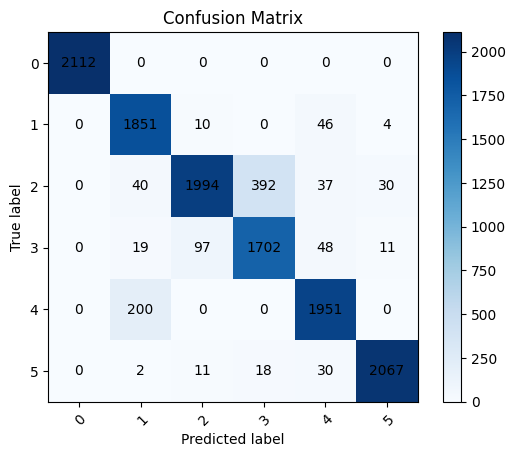

Accuracy: 0.9214804292929293
Precision: 0.9255938449664511
Recall: 0.9214804292929293
F1 Score: 0.9216480924974897
--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       529
           1       0.84      0.89      0.86       111
           2       0.89      0.75      0.81       154
           3       0.72      0.89      0.79       106
           4       0.82      0.83      0.83        78
           5       0.50      0.32      0.39        22

    accuracy                           0.91      1000
   macro avg       0.80      0.78      0.78      1000
weighted avg       0.91      0.91      0.91      1000

[[529   0   0   0   0   0]
 [  0  99   2   0   7   3]
 [  0   6 115  29   1   3]
 [  0   1  10  94   1   0]
 [  0  12   0   0  65   1]
 [  0   0   2   8   5   7]]


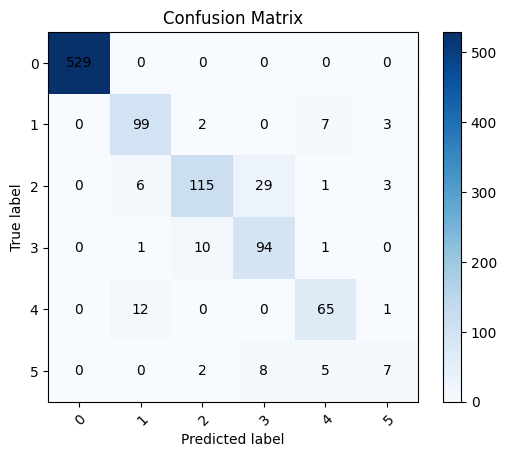

Accuracy: 0.909
Precision: 0.9170321021830456
Recall: 0.909
F1 Score: 0.9106412592702997
--------------------------------------------------------------
--------------------------------------------------------------
Feature Importance Rankings:
1. Port alive Duration (S): 28.735560496141265
2. Packets Matched: 20.043032577755675
3. Packets Looked Up: 14.033533972645209
4. Sent Packets: 7.49534377168318
5. Active Flow Entries: 6.740349104003289
6. Received Packets: 4.839909332698598
7. Received Bytes: 4.480431532311832
8. Sent Bytes: 3.9146726929363704
9. Connection Point: 2.1988226809699323
10. Delta Received Packets: 1.0017167791396642
11. Total Load/Latest: 0.9135924362719308
12. Delta Sent Bytes: 0.8771157532945906
13. Delta Received Bytes: 0.8339772565920047
14. Unknown Load/Latest: 0.7636731791742414
15. Unknown Load/Rate: 0.7218614699223663
16. Port Number: 0.6411453491468948
17. Delta Sent Packets: 0.5976688142377958
18. Latest bytes counter: 0.461799500344704
19. Delta Port aliv

<ipython-input-62-a09e8a35f23f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(s1, ignore_index=True)


,Model,F1_train,F1_test
0,Experiment,0.921648,0.910641


In [ ]:
rf_model(data, test_size = 0.2, use_smote_technique=1, target_feature="Label", experiment="Experiment", scores=scores_df)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 25, 'oob_score': True}
Best Score:  0.9129605757196495
OOB Score:  0.9017008504252126
--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2112
           1       0.90      0.98      0.94       432
           2       0.91      0.83      0.87       565
           3       0.85      0.88      0.87       507
           4       0.92      0.90      0.91       322
           5       0.96      0.92      0.94        60

    accuracy                           0.95      3998
   macro avg       0.92      0.92      0.92      3998
weighted avg       0.95      0.95      0.95      3998

[[2112    0    0    0    0    0]
 [   0  424    1    0    7    0]

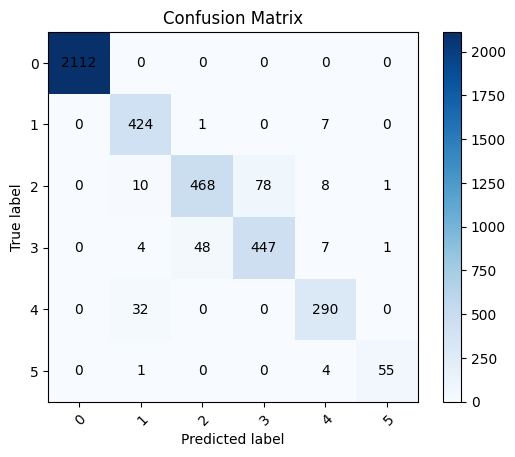

Accuracy: 0.9494747373686844
Precision: 0.9510341624611086
Recall: 0.9494747373686844
F1 Score: 0.9497773192018409
--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       529
           1       0.75      0.87      0.80       101
           2       0.84      0.81      0.82       134
           3       0.87      0.81      0.84       140
           4       0.77      0.74      0.76        82
           5       0.50      0.50      0.50        14

    accuracy                           0.91      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.91      0.91      0.91      1000

[[529   0   0   0   0   0]
 [  0  88   4   0   8   1]
 [  0   6 108  15   3   2]
 [  0   2  16 114   4   4]
 [  0  21   0   0  61   0]
 [  0   1   1   2   3   7]]


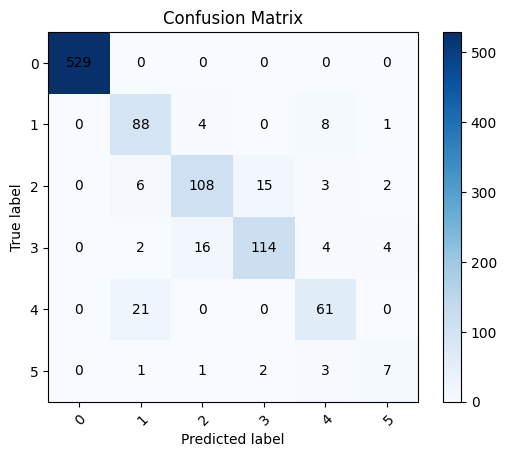

Accuracy: 0.907
Precision: 0.9082217516962054
Recall: 0.907
F1 Score: 0.9068551944666353
--------------------------------------------------------------
--------------------------------------------------------------
Feature Importance Rankings:
1. Port alive Duration (S): 27.932251977847095
2. Packets Matched: 19.649865081773434
3. Packets Looked Up: 14.14863540837526
4. Sent Packets: 7.398137433483543
5. Received Packets: 5.398911359328961
6. Received Bytes: 5.094955406696926
7. Active Flow Entries: 4.021045719925228
8. Sent Bytes: 4.012974201760338
9. Connection Point: 3.2606988580927685
10. Port Number: 1.3006856071399016
11. Delta Received Bytes: 1.2870191893782403
12. Total Load/Latest: 1.2515184781816893
13. Delta Sent Bytes: 1.2221247911949422
14. Delta Received Packets: 1.1699316598564704
15. Unknown Load/Latest: 0.778350075003978
16. Latest bytes counter: 0.5755214602833112
17. Delta Sent Packets: 0.5266897891146944
18. Unknown Load/Rate: 0.4808826929783769
19. Total Load/Rate:

<ipython-input-62-a09e8a35f23f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(s1, ignore_index=True)


,Model,F1_train,F1_test
0,Experiment,0.949777,0.906855


In [ ]:
rf_model(data, test_size = 0.2, use_smote_technique=0, target_feature="Label", experiment="Experiment", scores=scores_df)

In [ ]:
import lightgbm as lgb

def light_GBM(data, test_size = 0.2, use_smote_technique=1, target_feature="Label", experiment="Experiment", scores=scores_df):
    # Seperate the target variable
    X = data.drop(columns = [target_feature])
    y = data[target_feature]

    # if y.dtype != "int64":
    #     y = y.apply(encode_target)


    # Split the data into test and train
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 2, stratify = y)
    # if club_target:
    #     y_train = y_train.apply(club_class)
    #     y_test = y_test.apply(club_class)

    # Smote the data
    if use_smote_technique == 1:
        X_train, y_train = smote_data(X_train, y_train)

    # Random Forest Classifier - Machine Learning Model
    lgb_model = lgb.LGBMClassifier(random_state=42)
    param_grid = {
        'learning_rate': [0.1, 0.01],
        'n_estimators': [25],
        'num_leaves': [20,30,50],
        'min_child_samples': [10,20,30],
        'reg_alpha': [0, 1],
        'reg_lambda': [0, 1]
    }

    if use_smote_technique != 1:
        param_grid['class_weight'] = ['balanced', 'balanced_subsample']

    # Perform grid search to find the best combination of parameters
    grid_search = GridSearchCV(lgb_model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Obtain the best values and best score
    print("Best Parameters: ", grid_search.best_params_)
    print("Best Score: ", grid_search.best_score_)

    # Evaluation of model
    y_test_pred = grid_search.best_estimator_.predict(X_test)
    y_train_pred = grid_search.best_estimator_.predict(X_train)
    evaluation(y_train_pred, y_test_pred, y_train, y_test)

    # obtain Best Features
    best_model = grid_search.best_estimator_

    scores = get_metrics(y_train, best_model.predict(X_train), y_test, best_model.predict(X_test), experiment, scores)

    return scores

Class distribution before SMOTE: Counter({0: 2112, 3: 525, 2: 517, 1: 471, 4: 316, 5: 57})
Class distribution after SMOTE: Counter({3: 2112, 0: 2112, 1: 2112, 2: 2112, 4: 2112, 5: 2112})
Best Parameters:  {'learning_rate': 0.1, 'min_child_samples': 10, 'n_estimators': 25, 'num_leaves': 50, 'reg_alpha': 0, 'reg_lambda': 0}
Best Score:  0.9747485012508387
--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2112
           1       1.00      1.00      1.00      2108
           2       0.99      0.99      0.99      2112
           3       0.99      0.99      0.99      2117
           4       1.00      1.00      1.00      2111
           5       1.00      1.00      1.00      2112

    accuracy                           1.00     12672
   macro avg       1.00      1.00      1.00     12672
weighted av

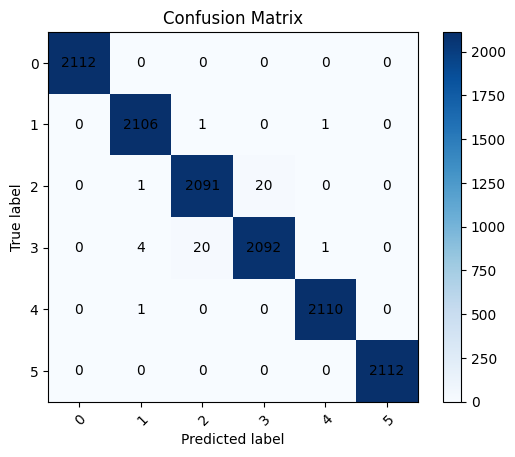

Accuracy: 0.9961332070707071
Precision: 0.9961375297541036
Recall: 0.9961332070707071
F1 Score: 0.9961349791166868
--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       529
           1       0.93      0.95      0.94       116
           2       0.86      0.83      0.85       133
           3       0.87      0.84      0.85       136
           4       0.92      0.99      0.95        74
           5       0.57      0.67      0.62        12

    accuracy                           0.94      1000
   macro avg       0.86      0.88      0.87      1000
weighted avg       0.95      0.94      0.94      1000

[[529   0   0   0   0   0]
 [  0 110   1   1   1   3]
 [  0   4 111  14   2   2]
 [  0   3  17 114   1   1]
 [  0   1   0   0  73   0]
 [  0   0   0   2   2   8]]


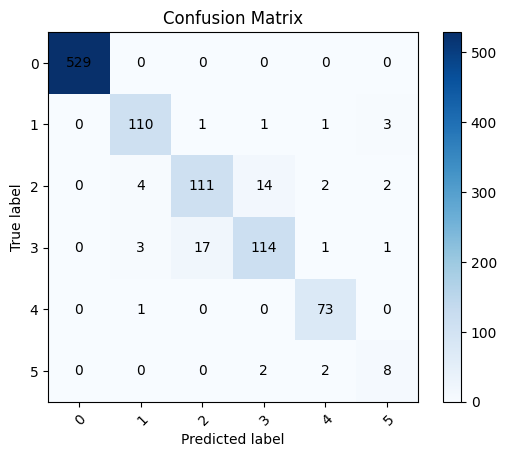

Accuracy: 0.945
Precision: 0.9456327951546539
Recall: 0.945
F1 Score: 0.9451116885213645
--------------------------------------------------------------
--------------------------------------------------------------


<ipython-input-62-a09e8a35f23f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(s1, ignore_index=True)


,Model,F1_train,F1_test
0,Experiment,0.996135,0.945112


In [ ]:
light_GBM(data, test_size = 0.2, use_smote_technique=1, target_feature="Label", experiment="Experiment", scores=scores_df)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 667, in fit
    class_sample_weight = _LGBMComputeSampl

Best Parameters:  {'class_weight': 'balanced', 'learning_rate': 0.1, 'min_child_samples': 10, 'n_estimators': 25, 'num_leaves': 30, 'reg_alpha': 0, 'reg_lambda': 0}
Best Score:  0.9377215269086356
--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2112
           1       1.00      1.00      1.00       469
           2       0.99      0.99      0.99       518
           3       0.99      0.99      0.99       525
           4       1.00      1.00      1.00       317
           5       1.00      1.00      1.00        57

    accuracy                           1.00      3998
   macro avg       1.00      1.00      1.00      3998
weighted avg       1.00      1.00      1.00      3998

[[2112    0    0    0    0    0]
 [   0  469    0    0    0    0]
 [   0    0  512    6    0    0]
 [   0    1    5

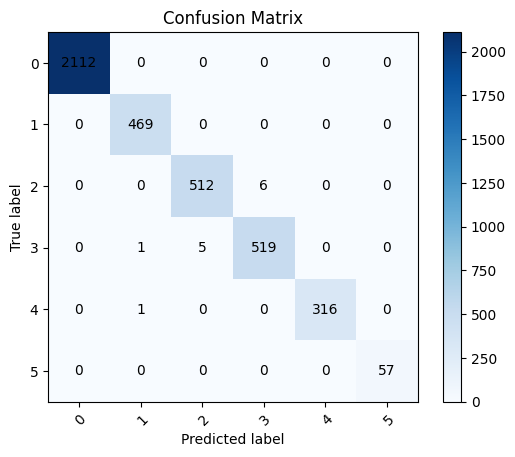

Accuracy: 0.9967483741870935
Precision: 0.9967520604266422
Recall: 0.9967483741870935
F1 Score: 0.9967493687442479
--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       529
           1       0.94      0.95      0.94       117
           2       0.87      0.82      0.84       137
           3       0.85      0.84      0.85       133
           4       0.92      0.99      0.95        74
           5       0.50      0.70      0.58        10

    accuracy                           0.94      1000
   macro avg       0.85      0.88      0.86      1000
weighted avg       0.95      0.94      0.94      1000

[[529   0   0   0   0   0]
 [  0 111   2   0   1   3]
 [  0   4 112  18   1   2]
 [  0   2  15 112   3   1]
 [  0   0   0   0  73   1]
 [  0   1   0   1   1   7]]


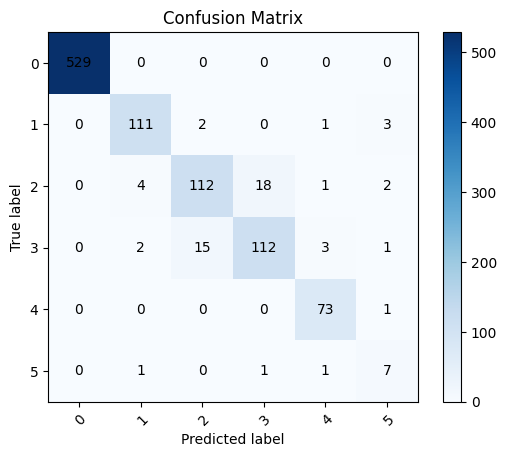

Accuracy: 0.944
Precision: 0.944456793869433
Recall: 0.944
F1 Score: 0.9438077221061147
--------------------------------------------------------------
--------------------------------------------------------------


<ipython-input-62-a09e8a35f23f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(s1, ignore_index=True)


,Model,F1_train,F1_test
0,Experiment,0.996749,0.943808


In [ ]:
light_GBM(data, test_size = 0.2, use_smote_technique=0, target_feature="Label", experiment="Experiment", scores=scores_df)

In [ ]:
# Define a mapping dictionary for class names
class_mapping = {
    0: 'Normal',
    1: 'Blackhole',
    2: 'TCP-SYN',
    3: 'PortScan',
    4: 'Diversion',
    5: 'Overflow'
}

# Map the numerical values to class names
data['Label'] = data['Label'].map(class_mapping)

# Convert the 'Label' column to categorical
data['Label'] = data['Label'].astype('category')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 5, 'oob_score': True}
Best Score:  0.9137086983729661
OOB Score:  0.9064532266133066
--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

   Blackhole       0.89      0.98      0.93       429
   Diversion       0.91      0.90      0.90       320
      Normal       1.00      1.00      1.00      2112
    Overflow       1.00      0.84      0.91        68
    PortScan       0.89      0.91      0.90       509
     TCP-SYN       0.93      0.86      0.89       560

    accuracy                           0.96      3998
   macro avg       0.94      0.91      0.92      3998
weighted avg       0.96      0.96      0.96      3998

[[ 419    7    0    0    0    3]
 [  33  287    0    0    0    0]
 [   0    0 2112    0    0   

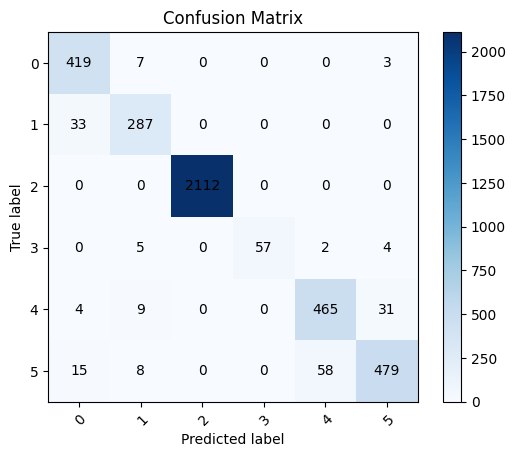

Accuracy: 0.9552276138069035
Precision: 0.9567407277431443
Recall: 0.9552276138069035
F1 Score: 0.9554285242711705
--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

   Blackhole       0.75      0.97      0.85        92
   Diversion       0.90      0.76      0.82        94
      Normal       1.00      1.00      1.00       529
    Overflow       0.64      0.56      0.60        16
    PortScan       0.79      0.83      0.81       124
     TCP-SYN       0.86      0.77      0.81       145

    accuracy                           0.91      1000
   macro avg       0.82      0.81      0.81      1000
weighted avg       0.92      0.91      0.91      1000

[[ 89   3   0   0   0   0]
 [ 23  71   0   0   0   0]
 [  0   0 529   0   0   0]
 [  0   2   0   9   5   0]
 [  1   2   0   0 103  18]
 [  5   1   0   5  23 111]]


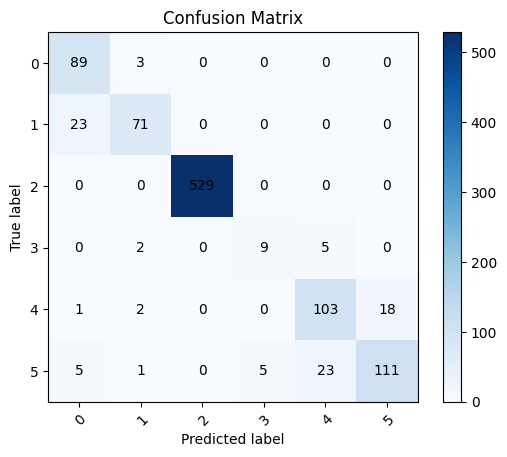

Accuracy: 0.912
Precision: 0.9182636269459642
Recall: 0.912
F1 Score: 0.9126086774104605
--------------------------------------------------------------
--------------------------------------------------------------
Feature Importance Rankings:
1. Port alive Duration (S): 26.08463626091442
2. Packets Matched: 15.83204502446233
3. Packets Looked Up: 14.169209208042805
4. Sent Packets: 11.449672708487595
5. Received Packets: 6.0455369908431855
6. Received Bytes: 5.775490630225335
7. Sent Bytes: 4.614587318693455
8. Active Flow Entries: 3.4896512525243444
9. Connection Point: 2.863487303578236
10. Delta Received Packets: 1.558046575528352
11. Delta Received Bytes: 1.3221683402660631
12. Delta Sent Bytes: 1.27440292281897
13. Delta Sent Packets: 0.9376995311229369
14. Port Number: 0.9057589699199522
15. Total Load/Latest: 0.8716236335978655
16. Unknown Load/Latest: 0.8265641786609261
17. Latest bytes counter: 0.6697462050383249
18. Unknown Load/Rate: 0.5828359599904909
19. Total Load/Rate: 

<ipython-input-62-a09e8a35f23f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(s1, ignore_index=True)


,Model,F1_train,F1_test
0,Experiment,0.955429,0.912609


In [ ]:
rf_model(data, test_size = 0.2, use_smote_technique=0, target_feature="Label", experiment="Experiment", scores=scores_df)

--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2112
           1       1.00      1.00      1.00       471
           2       1.00      1.00      1.00       517
           3       1.00      1.00      1.00       525
           4       1.00      1.00      1.00       316
           5       1.00      1.00      1.00        57

    accuracy                           1.00      3998
   macro avg       1.00      1.00      1.00      3998
weighted avg       1.00      1.00      1.00      3998

[[2112    0    0    0    0    0]
 [   0  471    0    0    0    0]
 [   0    0  517    0    0    0]
 [   0    0    0  525    0    0]
 [   0    0    0    0  316    0]
 [   0    0    0    0    0   57]]


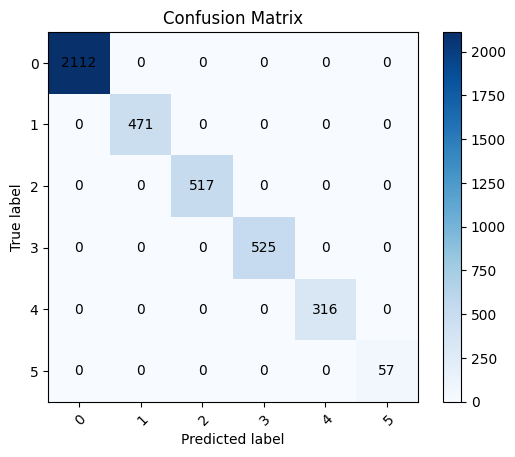

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       529
           1       0.93      0.89      0.91       124
           2       0.89      0.79      0.84       145
           3       0.86      0.86      0.86       132
           4       0.84      0.97      0.90        68
           5       0.14      1.00      0.25         2

    accuracy                           0.94      1000
   macro avg       0.78      0.92      0.79      1000
weighted avg       0.94      0.94      0.94      1000

[[529   0   0   0   0   0]
 [  0 110   0   0   8   6]
 [  0   6 115  18   2   4]
 [  0   1  14 113   3   1]
 [  0   1   0   0  66   1]
 [  0   0   0   0   0   2]]


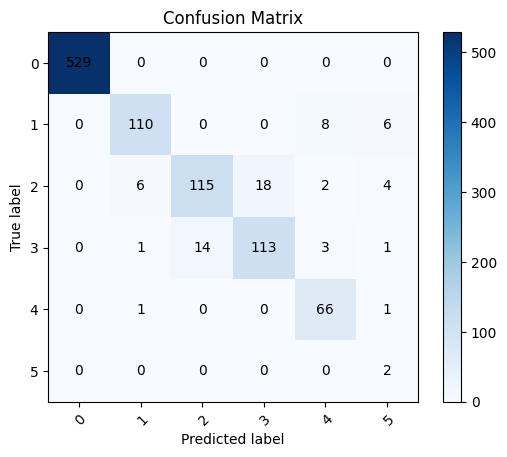

Accuracy: 0.935
Precision: 0.9388081741645995
Recall: 0.935
F1 Score: 0.9315665165211012
--------------------------------------------------------------
--------------------------------------------------------------
None


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
print(evaluation(y_train_pred, y_test_pred, y_train, y_test))

--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2112
           1       1.00      1.00      1.00       471
           2       1.00      1.00      1.00       517
           3       1.00      1.00      1.00       525
           4       1.00      1.00      1.00       316
           5       1.00      1.00      1.00        57

    accuracy                           1.00      3998
   macro avg       1.00      1.00      1.00      3998
weighted avg       1.00      1.00      1.00      3998

[[2112    0    0    0    0    0]
 [   0  471    0    0    0    0]
 [   0    0  517    0    0    0]
 [   0    0    0  525    0    0]
 [   0    0    0    0  316    0]
 [   0    0    0    0    0   57]]


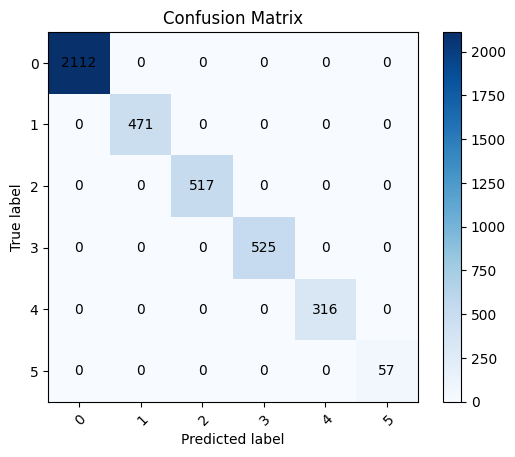

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       529
           1       0.93      0.90      0.92       122
           2       0.89      0.78      0.83       147
           3       0.85      0.87      0.86       128
           4       0.82      0.96      0.88        68
           5       0.43      1.00      0.60         6

    accuracy                           0.94      1000
   macro avg       0.82      0.92      0.85      1000
weighted avg       0.94      0.94      0.94      1000

[[529   0   0   0   0   0]
 [  0 110   0   0   9   3]
 [  0   7 115  20   2   3]
 [  0   0  14 111   3   0]
 [  0   1   0   0  65   2]
 [  0   0   0   0   0   6]]


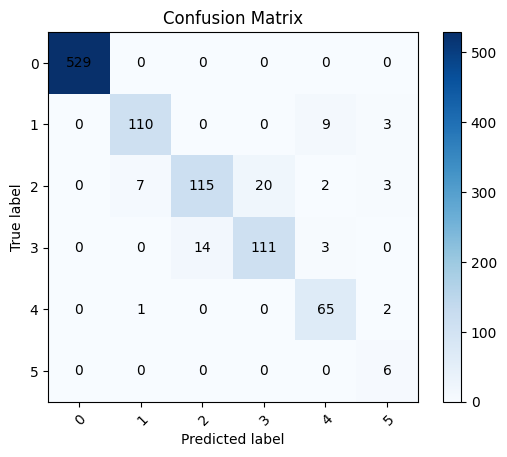

Accuracy: 0.936
Precision: 0.9394280783522425
Recall: 0.936
F1 Score: 0.9352163265306123
--------------------------------------------------------------
--------------------------------------------------------------
None


In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100, class_weight='balanced')
rfc.fit(X_train, y_train)
y_test_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)
print(evaluation(y_train_pred, y_test_pred, y_train, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters:  {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'min_samples_split': 5, 'oob_score': True}
Best Score:  0.9154593241551939
OOB Score:  0.9129564782391195
--------------------------------------------------------------
--------------------------------------------------------------
train_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2112
           1       0.92      0.98      0.95       440
           2       0.91      0.84      0.88       564
           3       0.86      0.90      0.88       506
           4       0.92      0.92      0.92       314
           5       0.98      0.90      0.94        62

    accuracy                           0.95      3998
   macro avg       0.93      0.92      0.93      3998
weighted avg       0.95      0.95      0.95      3998

[[2112    0    0    0    0    0]
 [   0  432    1    0    7    0]
 [   0   11  473   

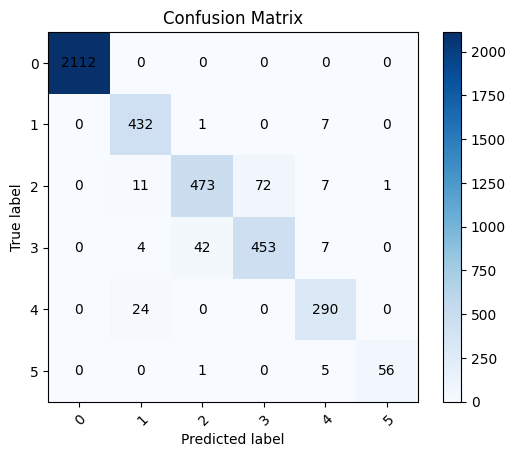

Accuracy: 0.9544772386193097
Precision: 0.955818054806985
Recall: 0.9544772386193097
F1 Score: 0.954740122883171
--------------------------------------------------------------

test_evaluation:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       529
           1       0.80      0.90      0.85       104
           2       0.88      0.80      0.83       142
           3       0.86      0.85      0.86       133
           4       0.80      0.81      0.80        78
           5       0.43      0.43      0.43        14

    accuracy                           0.92      1000
   macro avg       0.79      0.80      0.79      1000
weighted avg       0.92      0.92      0.92      1000

[[529   0   0   0   0   0]
 [  0  94   4   0   5   1]
 [  0   6 113  17   3   3]
 [  0   2  11 113   3   4]
 [  0  15   0   0  63   0]
 [  0   1   1   1   5   6]]


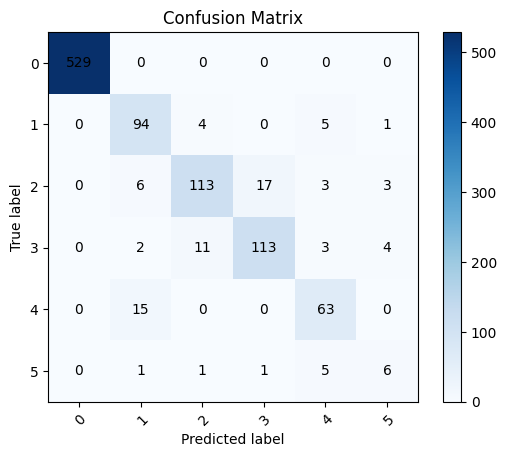

Accuracy: 0.918
Precision: 0.9194172199187025
Recall: 0.918
F1 Score: 0.9180524770005756
--------------------------------------------------------------
--------------------------------------------------------------
Feature Importance Rankings:
1. Port alive Duration (S): 26.667351031025525
2. Packets Matched: 16.256462155833702
3. Packets Looked Up: 14.315429034150585
4. Sent Packets: 11.250571671305512
5. Received Bytes: 5.848800050780549
6. Received Packets: 5.453901537279852
7. Sent Bytes: 4.424263547633083
8. Active Flow Entries: 3.530103365070104
9. Connection Point: 2.9844640623022554
10. Delta Received Packets: 1.3324307575760108
11. Delta Received Bytes: 1.2687166441041229
12. Delta Sent Bytes: 1.0667905096330856
13. Total Load/Latest: 1.0572502489846416
14. Port Number: 1.0218582182089333
15. Delta Sent Packets: 0.7821592379504625
16. Latest bytes counter: 0.7799447078669344
17. Unknown Load/Latest: 0.7228958129597841
18. Unknown Load/Rate: 0.6463364009534494
19. Total Load/Ra

<ipython-input-40-a09e8a35f23f>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(s1, ignore_index=True)


,Model,F1_train,F1_test
0,Experiment,0.95474,0.918052


In [42]:
rf_model(data, test_size = 0.2, use_smote_technique=0, target_feature="Label", experiment="Experiment", scores=scores_df)

#Transfer Learning model

In [43]:
pip install pytorch-tabnet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 836.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 790.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 48.7 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1+cu118
    Uninstalling torch-2.0.1+cu118:
      Successfully uninstalled torch-2.0.1+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.2+cu118 requires torch==2.0.1, but you have torch 1.13.1 which is incompatible.
torchdata 0.6.1 requires torch==2.0.1, but you have torch 1.13.1 which is inco

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pytorch_tabnet.tab_model import TabNetClassifier
# from pytorch_tabnet.utils import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Load and preprocess the tabular data
# data = pd.read_csv("your_dataset.csv")

# Assuming the target variable is named 'target'
target = data['Label']
features = data.drop(columns=['Label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Convert categorical features to integers using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize and train the TabNetClassifier for multi-class classification
clf = TabNetClassifier()
clf.fit(
    X_train.values, y_train_encoded,
    eval_set=[(X_test.values, y_test_encoded)],
    eval_name=['val'],
    max_epochs=100,
    patience=10,
)



/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.20417 | val_accuracy: 0.345   |  0:00:00s
epoch 1  | loss: 1.71784 | val_accuracy: 0.406   |  0:00:00s
epoch 2  | loss: 1.42116 | val_accuracy: 0.441   |  0:00:00s
epoch 3  | loss: 1.23482 | val_accuracy: 0.53    |  0:00:01s
epoch 4  | loss: 1.01023 | val_accuracy: 0.561   |  0:00:01s
epoch 5  | loss: 0.85643 | val_accuracy: 0.583   |  0:00:02s
epoch 6  | loss: 0.75352 | val_accuracy: 0.618   |  0:00:03s
epoch 7  | loss: 0.68997 | val_accuracy: 0.626   |  0:00:04s
epoch 8  | loss: 0.64013 | val_accuracy: 0.653   |  0:00:04s
epoch 9  | loss: 0.55501 | val_accuracy: 0.656   |  0:00:05s
epoch 10 | loss: 0.5159  | val_accuracy: 0.634   |  0:00:06s
epoch 11 | loss: 0.51289 | val_accuracy: 0.622   |  0:00:06s
epoch 12 | loss: 0.48872 | val_accuracy: 0.619   |  0:00:06s
epoch 13 | loss: 0.44992 | val_accuracy: 0.605   |  0:00:07s
epoch 14 | loss: 0.4485  | val_accuracy: 0.605   |  0:00:07s
epoch 15 | loss: 0.44105 | val_accuracy: 0.615   |  0:00:08s
epoch 16 | loss: 0.4171 

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [61]:

# Evaluate the model
eval_metrics = clf.history['val_accuracy']
best_epoch = np.argmax(eval_metrics)
best_val_loss = eval_metrics[best_epoch]

print(f"Best validation loss: {best_val_loss}")

# Make predictions
predictions = clf.predict(X_test.values)

# Convert integer predictions back to original class labels
predicted_classes = label_encoder.inverse_transform(predictions)

# You can use the predicted_classes for further evaluation and analysis

Best validation loss: 0.656
